In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# API_key = 'sH7bmbN1HAXkCIvXYx0AKuBVL'
# API_secret = 'x1Lhb9NSjMmrsXg4EEIwZNYxeH53BAVJP57bFODSAfBtBNef3R'
API_key = '6g6GavHlTETS5Q2vDtw6m6XH8'
API_secret = 'Ppsc4qpEeMUgQXKFDPzMaJTJo5ne7vYmtofv0shaHuOK6D5Y5B'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAANfqhgEAAAAAscuybQLANL1rcewX7ugUp2J%2BgxI%3DbqYqGrYtzZ4vvOjd9CyTbgy88AmEG0KvGnr4A7WIKt52WHTWbF'
access_token = '958417236565417984-eOu4BgOjY8kEgQ5O0zYnw7T02NXf5ox'
access_token_secret = 'TxPJuZqRErzySDKVpPrCRmYz0L7AleNsLutO8PU6xeHsr'


## Import Laibraries

In [22]:
!pip install better_profanity
import pandas as pd
import numpy as np
import re
import tweepy
import textblob
import matplotlib.pyplot as plt
import better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Setting up twitter Atuhs


In [23]:
auth = tweepy.OAuthHandler(
    API_key,
    API_secret,
    )
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)

tweets_arr = []

for st in tweepy.Cursor(api.search,'syria',count=1000).items(1000):
  tweets_arr.append(st)

len(tweets_arr)

1000

## import nltk and stop words

In [24]:
import nltk
nltk.download('stopwords')
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
## create pandas datafram from twitter api
tweets_obj = []

# tweets_arr[1]._json['text']
for i in range(len(tweets_arr)):
  tweet_obj = {
      'id':tweets_arr[i]._json['user']['id'],
      'screen_name':tweets_arr[i]._json['user']['screen_name'],
      'name':tweets_arr[i]._json['user']['name'],
      'text':tweets_arr[i]._json['text'],
      'location':tweets_arr[i]._json['user']['location'],
      'description':tweets_arr[i]._json['user']['description']
  }
  tweets_obj.append(tweet_obj)


twitter_df = pd.DataFrame(tweets_obj)

# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

# from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))

# pd.set_option('max_colwidth',200)

# def clean_data(text_df):
#   arr = []
#   for i in range(0,len(text_df['text'])):
#     if i in text_df['text']:
#       arr.append(re.sub('[^a-zA-Z]',' ',text_df['text'][i]).lower().split())
#     else:
#       arr.append(re.sub('[^a-zA-Z]',' ',text_df.iloc[i,:]['text']).lower().split())
#       # print(type(text_df.iloc[i,:]['dialogue']))
#   for i in range(len(arr)):
#     arr[i] = ' '.join([ps.stem(t) for t in arr[i] if t not in stop_words])

#   return arr

# len(clean_data(twitter_df))
twitter_df

,id,screen_name,name,text,location,description
0,1496777421844013057,Neptune_2010,Freedom Fighter 🇦🇱,RT @AP: An @AP and @frontlinepbs investigation...,,
1,543100520,jucanor,jc,RT @VanessaBeeley: Normalising Nazis\n\nJust a...,"Orlando, FL",The barbarous gold barons;they didn't find the...
2,1440695737424101387,Abdullamosh13,Abdullah,"RT @HadiNasrallah: Wesley Clark in 2007: ""We a...",,Serial Investor || Budding Political Economist...
3,1573485591085326345,cyrusthegr3at,cyrusthegreat,RT @WafaMustafa9: From #Syria to #Iran:\n\nWom...,,
4,42659201,zandapheri,MYRALIS ⌬ ALZAPHARYX,"RT @HadiNasrallah: Wesley Clark in 2007: ""We a...",spoof doke,trying to find out what to do
...,...,...,...,...,...,...
995,983615277119123457,wishtobethere64,Far From Home,RT @SamanArbabi: #Iran protests have also impa...,"Vancouver, British Columbia",A human!
996,972870912935677952,libertyfarmer4u,Sandy-Haired Libertarian,@reggieoak @dzeimzteilor @CyrusShares @NickPCa...,Sailing. Sailing away....,My cat's name is Hoppe and he likes to push th...
997,928712572471336960,BrendaHazelhur1,Persephone,RT @ToomuchMorgans: @HadiNasrallah Surely Iran...,USA,born Alabama in early 1950's
998,834498430986809344,AP_Europe,AP Europe,RT @AP: An @AP and @frontlinepbs investigation...,Europe,News from @AP's team of journalists in Europe....


In [26]:

positive = 0
negative = 0
normal = 0
pol = 0

positive_arr = []
negative_arr = []
normal_arr = []

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
for t in twitter_df['text']:
  # print(t)
  sia = SentimentIntensityAnalyzer().polarity_scores(t)
  analysis = TextBlob(t)

  neg = sia['neg']
  pos = sia['pos']
  nor = sia['neu']
  comp = sia['compound']
  pol+=analysis.sentiment.polarity

  if neg > pos:
    negative_arr.append(t)
    negative += 1
  elif pos > neg:
    positive_arr.append(t)
    positive += 1
  elif pos == neg:
    normal_arr.append(t)
    normal+=1

In [27]:
print('Positive: {} %'.format((len(positive_arr) / len(twitter_df['text'])) * 100))
print('negative: {} %'.format((len(negative_arr) / len(twitter_df['text'])) * 100))
print('Positive: {} %'.format((len(normal_arr) / len(twitter_df['text'])) * 100))

Positive: 29.5 %
negative: 30.8 %
Positive: 39.7 %


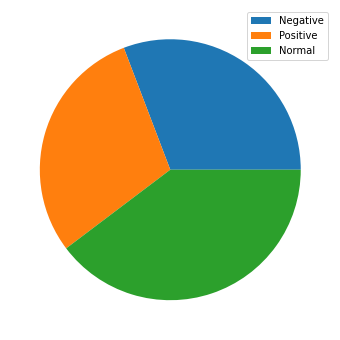

In [28]:
# plot the distribution of text sentiment

plt.figure(figsize=(15,6))
plt.pie([negative,positive,normal])
plt.legend(['Negative','Positive','Normal'])

In [29]:
# Clean Tweets

twitter_df.drop_duplicates(inplace=True)

## add featured tweets to another column
twitter_df['featured_text'] = twitter_df['text']
## regex for removing unused charecters
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub('(@[A-Za-z0–9]+)|(\w+:\/\/\S+)'," ",x)

twitter_df['featured_text'] = twitter_df.featured_text.map(remove_rt).map(rt)
twitter_df['featured_text'] = twitter_df['featured_text'].str.lower()
twitter_df.featured_text

0       an   and   investigation tracked more than th...
1       normalising nazis\n\njust as they normalised ...
2       wesley clark in 2007: "we are going to take o...
3       from #syria to #iran:\n\nwomen       •       ...
4       wesley clark in 2007: "we are going to take o...
                             ...                        
995     #iran protests have also impacted women in #a...
996                       1    3     it's all part of…  
997       surely iranians are aware of what's happene...
998     an   and   investigation tracked more than th...
999      _getachew #adidaeromassacre 💔\n\nthis’s not ...
Name: featured_text, Length: 999, dtype: object

## Sentiment Anaysis

In [30]:
## Positive, Negative, Netural and Comound count

'''
* TextBlob is a Python (2 and 3) library for processing textual data. 
    It provides a simple API for diving into common natural language processing (NLP) tasks such as
    part-of-speech tagging, 
    noun phrase extraction, sentiment analysis, classification, translation, and more
** Basic operations of textblob library
1- POS Tagging: list the part of speach tags into theb property

2- sentiment: return tuple (polarity,subjectivity) the value of each item is between 0 and 1

3- Tokenization:
'''

twitter_df[['polarity','subjectivity']] = twitter_df['featured_text'].apply(lambda x:pd.Series(TextBlob(x).sentiment))

for i,row in twitter_df['featured_text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)

  neg = score['neg']
  nor = score['neu']
  pos = score['pos']
  comp = score['compound']

  if neg > pos:
    twitter_df.loc[i,'sentiment'] = 'negative'
  elif pos>neg:
    twitter_df.loc[i,'sentiment'] = 'positive'
  else:
    twitter_df.loc[i,'sentiment'] = 'normal'
  twitter_df.loc[i,'negative_number'] = neg
  twitter_df.loc[i,'positive_number'] = pos
  twitter_df.loc[i,'norma_number'] = nor
  twitter_df.loc[i,'compound_number'] = comp

twitter_df.head(10)

,id,screen_name,name,text,location,description,featured_text,polarity,subjectivity,sentiment,negative_number,positive_number,norma_number,compound_number
0,1496777421844013057,Neptune_2010,Freedom Fighter 🇦🇱,RT @AP: An @AP and @frontlinepbs investigation...,,,an and investigation tracked more than th...,0.250000,0.250000,negative,0.279,0.000,0.721,-0.7003
1,543100520,jucanor,jc,RT @VanessaBeeley: Normalising Nazis\n\nJust a...,"Orlando, FL",The barbarous gold barons;they didn't find the...,normalising nazis\n\njust as they normalised ...,0.000000,0.000000,normal,0.000,0.000,1.000,0.0000
2,1440695737424101387,Abdullamosh13,Abdullah,"RT @HadiNasrallah: Wesley Clark in 2007: ""We a...",,Serial Investor || Budding Political Economist...,"wesley clark in 2007: ""we are going to take o...",0.000000,0.000000,normal,0.000,0.000,1.000,0.0000
3,1573485591085326345,cyrusthegr3at,cyrusthegreat,RT @WafaMustafa9: From #Syria to #Iran:\n\nWom...,,,from #syria to #iran:\n\nwomen • ...,0.000000,0.000000,positive,0.000,0.401,0.599,0.8655
4,42659201,zandapheri,MYRALIS ⌬ ALZAPHARYX,"RT @HadiNasrallah: Wesley Clark in 2007: ""We a...",spoof doke,trying to find out what to do,"wesley clark in 2007: ""we are going to take o...",0.000000,0.000000,normal,0.000,0.000,1.000,0.0000
5,1520738533262213121,Pygmali25885391,Pygmalion,@m_meissl @Fernpick @drshpk @vtchakarova Syria...,,,_meissl syria was/is a civil war and pe...,0.000000,0.000000,negative,0.345,0.000,0.655,-0.6511
6,2875408864,KarmaYogi26,उत्तिष्ठ भारत | Arise Bharat 🕉️🙏🇮🇳 🌺☮️,"RT @AbhishBanerj: Today begins Yom Kippur, the...",ಬೆಂಗಳೂರು | नागपूर | भारत,यत्करोषि यदश्नासि यज्जुहोषि ददासि यत् |\nयत्तप...,"today begins yom kippur, the holiest day on t...",0.000000,0.000000,positive,0.119,0.124,0.756,0.0323
7,1499242740441178113,CornishMiner186,Robert Old Blue,RT @A_SHEKH0VTS0V: A sophisticated Russian-run...,United States,Bio,a sophisticated russian-run smuggling operati...,0.500000,1.000000,negative,0.396,0.160,0.444,-0.6486
8,18823026,dylan_reid,Dylan Reid,RT @nixonron: A great investigation by my coll...,Toronto,"City man: Toronto (Spacing magazine), walking ...",a great investigation by my colleagues. the ...,0.266667,0.583333,positive,0.153,0.203,0.644,0.2500
9,421699307,LaurentFranckx,Laurent Franckx 🇧🇪🇪🇺 🏳️‍🌈,In the 12 months since the Congolese governmen...,Belgium,"Environmental and transport economist, omnivor...",in the 12 months since the congolese governmen...,-0.300000,0.200000,negative,0.136,0.000,0.864,-0.4588


In [41]:
# remove punctuation
import string
def remove_point(text):
  text = ''.join([c for c in text if c not in string.punctuation])

  return text

twitter_df['punct'] = twitter_df['featured_text'].apply(lambda x: remove_point(x))

#Tokenizations
def tokenize_text(text):
  text = re.split('\W+',text)
  return text

twitter_df['tokenized'] = twitter_df['punct'].apply(lambda x: tokenize_text(x.lower()))

# remove stopwords from tweets
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  text = [word for word in text if word not in stopwords]
  return text

twitter_df['no_stop'] = twitter_df['tokenized'].apply(lambda x:remove_stopwords(x))

# Stemmer
ps = nltk.PorterStemmer()

def apply_stem(text):
  text = [ps.stem(word) for word in text]
  return text

twitter_df['stemmed'] = twitter_df['no_stop'].apply(lambda x:apply_stem(x))

# clean text finally

def clean_text(text):
  text_lower = ''.join([word.lower() for word in text if word not in string.punctuation])
  text_no_number = re.sub('[0-9]+','',text_lower)
  text_rc = re.split('\W+',text_no_number)
  text = [ps.stem(word) for word in text_rc if word not in stopwords]

  return text

twitter_df.head(10)

,id,screen_name,name,text,location,description,featured_text,polarity,subjectivity,sentiment,negative_number,positive_number,norma_number,compound_number,punct,tokenized,no_stop,stemmed
0,1496777421844013057,Neptune_2010,Freedom Fighter 🇦🇱,RT @AP: An @AP and @frontlinepbs investigation...,,,an and investigation tracked more than th...,0.250000,0.250000,negative,0.279,0.000,0.721,-0.7003,an and investigation tracked more than th...,"[, an, and, investigation, tracked, more, than...","[, investigation, tracked, three, dozen, ships...","[, investig, track, three, dozen, ship, reveal..."
1,543100520,jucanor,jc,RT @VanessaBeeley: Normalising Nazis\n\nJust a...,"Orlando, FL",The barbarous gold barons;they didn't find the...,normalising nazis\n\njust as they normalised ...,0.000000,0.000000,normal,0.000,0.000,1.000,0.0000,normalising nazis\n\njust as they normalised ...,"[, normalising, nazis, just, as, they, normali...","[, normalising, nazis, normalised, al, qaeda, ...","[, normalis, nazi, normalis, al, qaeda, syria, ]"
2,1440695737424101387,Abdullamosh13,Abdullah,"RT @HadiNasrallah: Wesley Clark in 2007: ""We a...",,Serial Investor || Budding Political Economist...,"wesley clark in 2007: ""we are going to take o...",0.000000,0.000000,normal,0.000,0.000,1.000,0.0000,wesley clark in 2007 we are going to take out...,"[, wesley, clark, in, 2007, we, are, going, to...","[, wesley, clark, 2007, going, take, 7, countr...","[, wesley, clark, 2007, go, take, 7, countri, ..."
3,1573485591085326345,cyrusthegr3at,cyrusthegreat,RT @WafaMustafa9: From #Syria to #Iran:\n\nWom...,,,from #syria to #iran:\n\nwomen • ...,0.000000,0.000000,positive,0.000,0.401,0.599,0.8655,from syria to iran\n\nwomen • lif...,"[, from, syria, to, iran, women, life, freedom...","[, syria, iran, women, life, freedom, freedom,...","[, syria, iran, women, life, freedom, freedom,..."
4,42659201,zandapheri,MYRALIS ⌬ ALZAPHARYX,"RT @HadiNasrallah: Wesley Clark in 2007: ""We a...",spoof doke,trying to find out what to do,"wesley clark in 2007: ""we are going to take o...",0.000000,0.000000,normal,0.000,0.000,1.000,0.0000,wesley clark in 2007 we are going to take out...,"[, wesley, clark, in, 2007, we, are, going, to...","[, wesley, clark, 2007, going, take, 7, countr...","[, wesley, clark, 2007, go, take, 7, countri, ..."
5,1520738533262213121,Pygmali25885391,Pygmalion,@m_meissl @Fernpick @drshpk @vtchakarova Syria...,,,_meissl syria was/is a civil war and pe...,0.000000,0.000000,negative,0.345,0.000,0.655,-0.6511,meissl syria wasis a civil war and peop...,"[, meissl, syria, wasis, a, civil, war, and, p...","[, meissl, syria, wasis, civil, war, people, d...","[, meissl, syria, wasi, civil, war, peopl, don..."
6,2875408864,KarmaYogi26,उत्तिष्ठ भारत | Arise Bharat 🕉️🙏🇮🇳 🌺☮️,"RT @AbhishBanerj: Today begins Yom Kippur, the...",ಬೆಂಗಳೂರು | नागपूर | भारत,यत्करोषि यदश्नासि यज्जुहोषि ददासि यत् |\nयत्तप...,"today begins yom kippur, the holiest day on t...",0.000000,0.000000,positive,0.119,0.124,0.756,0.0323,today begins yom kippur the holiest day on th...,"[, today, begins, yom, kippur, the, holiest, d...","[, today, begins, yom, kippur, holiest, day, j...","[, today, begin, yom, kippur, holiest, day, je..."
7,1499242740441178113,CornishMiner186,Robert Old Blue,RT @A_SHEKH0VTS0V: A sophisticated Russian-run...,United States,Bio,a sophisticated russian-run smuggling operati...,0.500000,1.000000,negative,0.396,0.160,0.444,-0.6486,a sophisticated russianrun smuggling operatio...,"[, a, sophisticated, russianrun, smuggling, op...","[, sophisticated, russianrun, smuggling, opera...","[, sophist, russianrun, smuggl, oper, use, fal..."
8,18823026,dylan_reid,Dylan Reid,RT @nixonron: A great investigation by my coll...,Toronto,"City man: Toronto (Spacing magazine), walking ...",a great investigation by my colleagues. the ...,0.266667,0.583333,positive,0.153,0.203,0.644,0.2500,a great investigation by my colleagues the ...,"[, a, great, investigation, by, my, colleagues...","[, great, investiga

## Vectorizer from sklearn library

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=clean_text)
count_vector = cv.fit_transform(twitter_df['featured_text'])

print(count_vector.shape)

count_vector_df = pd.DataFrame(count_vector.toarray(),columns=cv.get_feature_names())

count_vector_df.head()

(999, 2359)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aa,aan,aap,abd,abdullah,abhorr,abl,ablaz,abraham,...,つかまり歩き,ゆきりんスペース,よく覚えてましたねー,シリア,シリア北部と東部に長期間にわたり違法に潜在しており,原油の略奪が継続,同国の石油資源と穀物の略奪に加えて,私もさっき腰が痛い,米軍とその系列のテロリスト因子は,米軍による
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
print(count_vector_df.sum().sort_values(0,ascending=True).head(20)) #most used words

oct                  1
wasi                 1
wasnt                1
wat                  1
wave                 1
wbu                  1
wednesday            1
wh                   1
whatev               1
whether              1
lancelot             1
lalu                 1
ladi                 1
kurdistan            1
whr                  1
wiedervereinigung    1
kuliah               1
kristo               1
warrant              1
warplan              1
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.
